# Read Data

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

train_file = '../input/train.csv'
data = pd.read_csv(train_file, delimiter=',')
test_file = '../input/test.csv'
tdata = pd.read_csv(test_file, delimiter=',')

train_data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Fare', 'Survived', 'Name', 'Ticket']]
test_data = tdata[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Fare', 'Name', 'Ticket']]

def update_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(',')[0])
    return df

def update_sex(df):
    df.Sex = df.Sex.str[0]
    return df

def update_cabin(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.str[0]
    return df

def update_fare(df):
    df.Fare = df.Fare.fillna(0)
    bins = (-1, 0, 8, 15, 31, 60, 513)
    bin_names = [0, 1, 2, 3, 4, 5]
    df.Fare = pd.cut(df.Fare, bins, labels=bin_names)
    return df

def update_age(df):
    df.Age = df.Age.fillna(0)
    bins = (-1, 0, 5, 12, 20, 28, 38, 60, 90)
    bin_names = [0, 1, 2, 3, 4, 5, 6, 7]
    df.Age = pd.cut(df.Age, bins, labels=bin_names)
    return df

def update_columns(df):
    df = update_name(df)
    df = update_sex(df)
    df = update_cabin(df)
    df = update_fare(df)
    df = update_age(df)
    df = df.drop(['Name'], axis=1)
    return df

train_data = update_columns(train_data)
test_data = update_columns(test_data)

def encode_features(df):
    features = ['Sex', 'Ticket', 'Cabin', 'Lname']
    df_combined = df[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df[feature] = le.transform(df[feature])
    return df
    
train_data = encode_features(train_data)
test_data = encode_features(test_data)

X_all = train_data.drop(['Survived'], axis=1)
y_all = train_data['Survived']

# Analysis

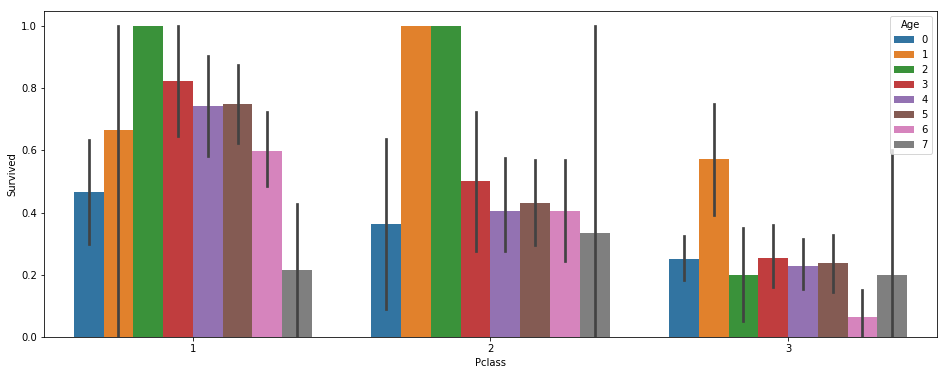

In [2]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Pclass", y="Survived", hue="Age", data=train_data);

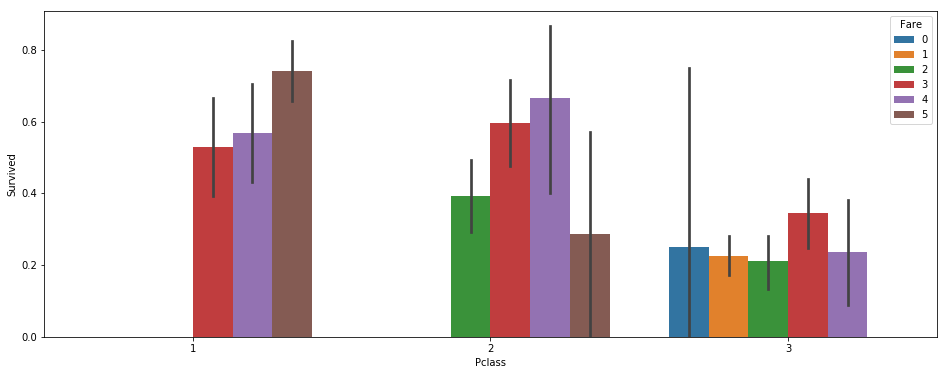

In [3]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Pclass", y="Survived", hue="Fare", data=train_data);

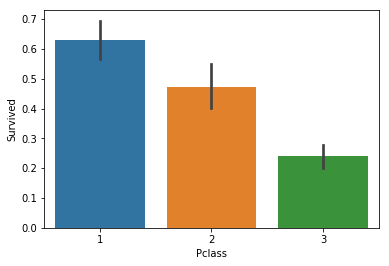

In [4]:
sns.barplot(x="Pclass", y="Survived", data=train_data);

# Supervised Learning

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=100)
clf.fit(X_all, y_all)
test_predictions = clf.predict(test_data)

preds = {'PassengerId': tdata['PassengerId'], 'Survived': test_predictions}
df = pd.DataFrame(data=preds)
df.to_csv('preds.csv', sep=',', index=False)